# Loan Data from Prosper Exploration
## by Kexin Yao

## Investigation Overview

In this investigation, I wanted to look at the characteristics of loans that could be used to predict their loan original amount. The main focus was on the income range,borrower range,term and prosperscore of loans.

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans_subset=pd.read_csv('loans_subset.csv')

## Distribution of the Loans Original Amount 
The Original amount of loan,from the small binsize it can see clearly,There are very large spikes in frequency at the bars with 5000, (e.g.5000,10000,15000); frequency quickly trails off until the next spike. These probably represent standard loan amount for use specify listing category.

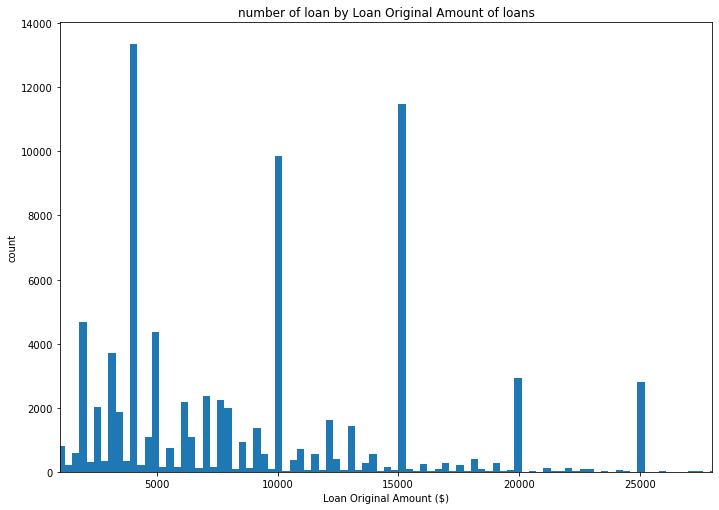

In [3]:
plt.figure(figsize=[11.69, 8.27])
default_color = sb.color_palette()[0]
plt.title('number of loan by Loan Original Amount of loans')
binsize=300
bins = np.arange(0, loans_subset['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data =loans_subset,x = 'LoanOriginalAmount', bins = bins,color=default_color)
plt.xlim([1000,28000])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

## Loan Original Amount by Prosper Score and Income Range
As we can see, In general,the prosper score and income range increased, the Loan Original amount also increased, but for the Income range are not employed and $0, even with high prosper score, the loan original amount is 0.

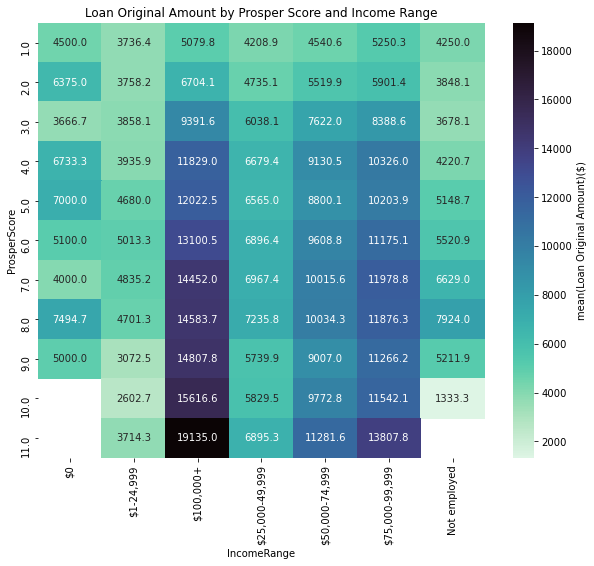

In [4]:
cat_means=loans_subset.groupby(['ProsperScore','IncomeRange']).mean()['LoanOriginalAmount']
cat_means=cat_means.reset_index(name="LoanOriginalAmount_avg")
cat_means=cat_means.pivot(index='ProsperScore',columns='IncomeRange',values='LoanOriginalAmount_avg')
plt.figure(figsize = [10,8])
plt.title('Loan Original Amount by Prosper Score and Income Range');
sb.heatmap(cat_means,annot=True,fmt='.1f',cbar_kws={'label':'mean(Loan Original Amount)($)'},cmap="mako_r",);

## Loan Original Amount by Prosperscore and Term 
With the term and prosper score increased, the loan original amount have increased. 

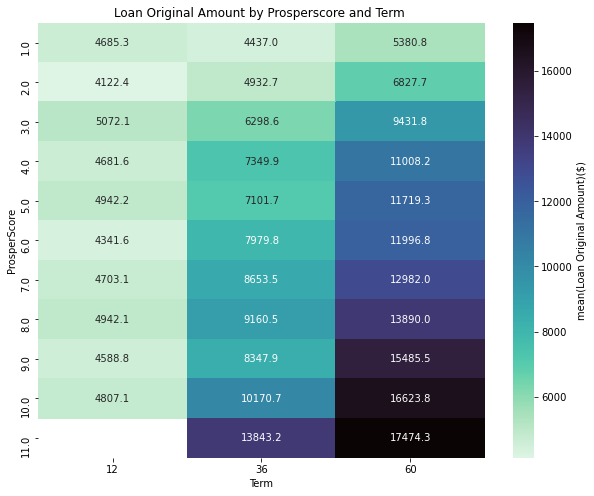

In [5]:
cat_means=loans_subset.groupby(['ProsperScore','Term']).mean()['LoanOriginalAmount']
cat_means=cat_means.reset_index(name="LoanOriginalAmount_avg")
cat_means=cat_means.pivot(index='ProsperScore',columns='Term',values='LoanOriginalAmount_avg')
plt.figure(figsize = [10,8])
plt.title('Loan Original Amount by Prosperscore and Term ');
plt.ylabel('Prosper Score')
plt.xlabel('Term (month)');
sb.heatmap(cat_means,annot=True,fmt='.1f',cbar_kws={'label':'mean(Loan Original Amount)($)'},cmap="mako_r");

## Loan Original Amount by Income Range and Term
It is also obvious that the loan original amount is increased with the higher income range and longer term.

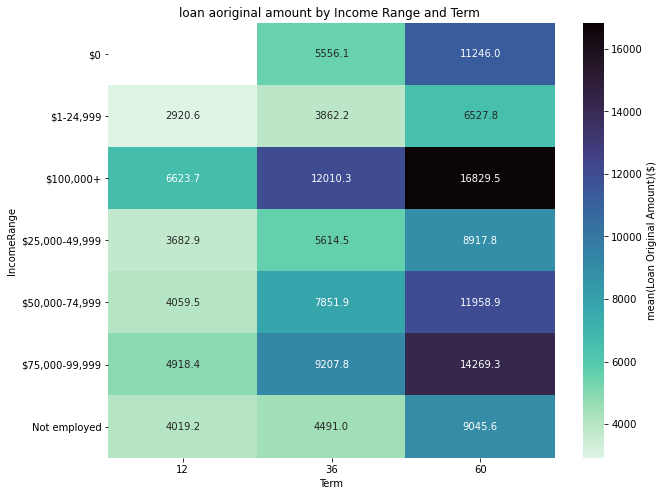

In [6]:
cat_means=loans_subset.groupby(['IncomeRange','Term']).mean()['LoanOriginalAmount']
cat_means=cat_means.reset_index(name="LoanOriginalAmount_avg")
cat_means=cat_means.pivot(index='IncomeRange',columns='Term',values='LoanOriginalAmount_avg')
plt.figure(figsize = [10,8])
plt.title('loan aoriginal amount by Income Range and Term ');
plt.ylabel('Prosper Score')
plt.xlabel('Term (month)');
sb.heatmap(cat_means,annot=True,fmt='.1f',cbar_kws={'label':'mean(Loan Original Amount)($)'},cmap="mako_r");

## Different Loan Original Amount across Income Range and Prosper Score
Interestingly, that for the original amount around 5000, the prosper score is increased with the amount of the original loan. But for the original amount around 20000, the prosper score is decreased with the amount of the original loan.

In [7]:
loans_subset_flag = (loans_subset['LoanOriginalAmount'] >=4000) & (loans_subset['LoanOriginalAmount'] <= 6000)
loans_subset_5000 = loans_subset.loc[loans_subset_flag,:]
loans_subset_flag = (loans_subset['LoanOriginalAmount'] >=19000) & (loans_subset['LoanOriginalAmount'] <= 21000)
loans_subset_20000 = loans_subset.loc[loans_subset_flag,:]

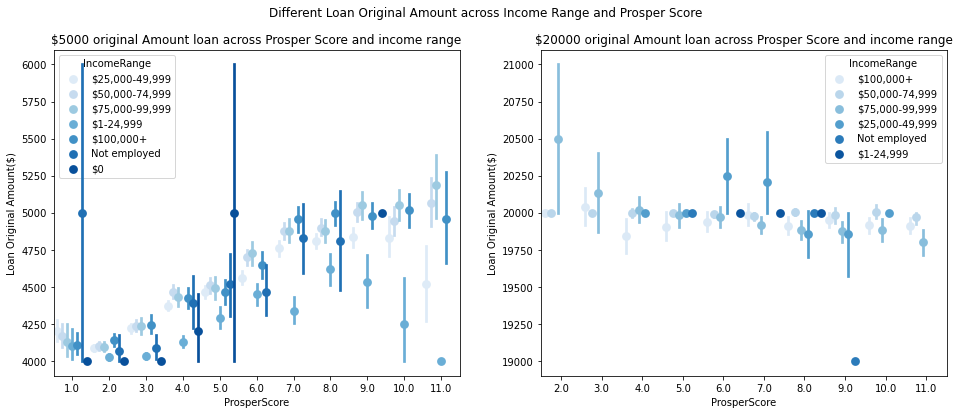

In [8]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,6])
plt.suptitle('Different Loan Original Amount across Income Range and Prosper Score')
sb.pointplot(data = loans_subset_5000 , x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.8, ax = ax[0])
ax[0].set_title('$5000 original Amount loan across Prosper Score and income range')
ax[0].set_ylabel('Loan Original Amount($)')


sb.pointplot(data = loans_subset_20000 , x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge =0.8,ax = ax[1])
ax[1].set_title('$20000 original Amount loan across Prosper Score and income range')
ax[1].set_ylabel('Loan Original Amount($)')

plt.show();


In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 865485 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck.slides.html
Use Control-C to stop this server
